# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='
units  = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | bowmore
Processing Record 5 of Set 1 | potchefstroom
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | manassas park
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | port hardy
Processing Re

Processing Record 32 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 34 of Set 4 | santa vitoria do palmar
Processing Record 35 of Set 4 | sao filipe
Processing Record 36 of Set 4 | maceio
Processing Record 37 of Set 4 | champerico
Processing Record 38 of Set 4 | yerbogachen
Processing Record 39 of Set 4 | awjilah
Processing Record 40 of Set 4 | muros
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | marovoay
Processing Record 46 of Set 4 | rawlins
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | katherine
Processing Record 0 of Set 5 | mezen
Processing Record 1 of Set 5 | ugoofaaru
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 

Processing Record 23 of Set 8 | puerto gaitan
Processing Record 24 of Set 8 | dubbo
Processing Record 25 of Set 8 | nome
Processing Record 26 of Set 8 | takanabe
Processing Record 27 of Set 8 | mount isa
Processing Record 28 of Set 8 | bosaso
Processing Record 29 of Set 8 | korla
Processing Record 30 of Set 8 | ulaangom
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | kutum
Processing Record 33 of Set 8 | halalo
City not found. Skipping...
Processing Record 34 of Set 8 | baruun-urt
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | mocambique
City not found. Skipping...
Processing Record 37 of Set 8 | kiunga
Processing Record 38 of Set 8 | bhitarwar
Processing Record 39 of Set 8 | huilong
Processing Record 40 of Set 8 | bintulu
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | clovis
Processing Record 45 of 

Processing Record 11 of Set 12 | the valley
Processing Record 12 of Set 12 | benemerito de las americas
Processing Record 13 of Set 12 | aldan
Processing Record 14 of Set 12 | louis trichardt
Processing Record 15 of Set 12 | russell
Processing Record 16 of Set 12 | bud
Processing Record 17 of Set 12 | nijar
Processing Record 18 of Set 12 | lieksa
Processing Record 19 of Set 12 | vincennes
Processing Record 20 of Set 12 | kommunisticheskiy
Processing Record 21 of Set 12 | biak
Processing Record 22 of Set 12 | fort nelson
Processing Record 23 of Set 12 | oranjemund
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | ljaskovec
City not found. Skipping...
Processing Record 26 of Set 12 | ibra
Processing Record 27 of Set 12 | lucapa
Processing Record 28 of Set 12 | monclova
Processing Record 29 of Set 12 | mabamba
Processing Record 30 of Set 12 | fuerte olimpo
Processing Record 31 of Set 12 | sidi ali
Processing Record 32 of Set 12 | oriximina
Processing Record 33 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adrar,20.5022,-10.0711,26.03,12,73,4.86,MR,1676839706
1,yulara,-25.2406,130.9889,23.84,52,1,2.07,AU,1676839707
2,barrow,71.2906,-156.7887,-21.99,77,100,0.00,US,1676839708
3,bowmore,34.9421,-79.3031,16.79,67,100,3.09,US,1676839709
4,potchefstroom,-26.7167,27.1000,18.97,76,83,3.21,ZA,1676839710


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adrar,20.5022,-10.0711,26.03,12,73,4.86,MR,1676839706
1,yulara,-25.2406,130.9889,23.84,52,1,2.07,AU,1676839707
2,barrow,71.2906,-156.7887,-21.99,77,100,0.00,US,1676839708
3,bowmore,34.9421,-79.3031,16.79,67,100,3.09,US,1676839709
4,potchefstroom,-26.7167,27.1000,18.97,76,83,3.21,ZA,1676839710


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

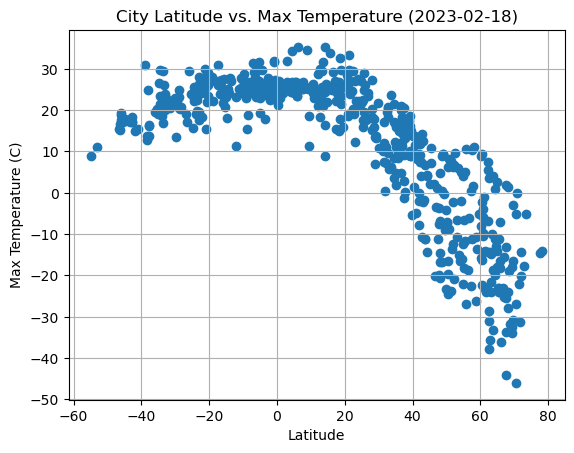

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

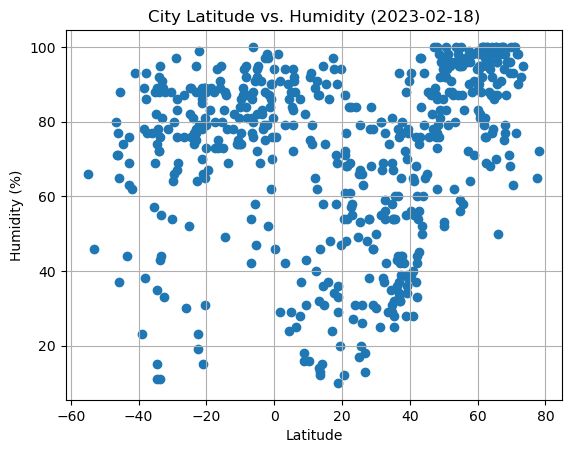

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

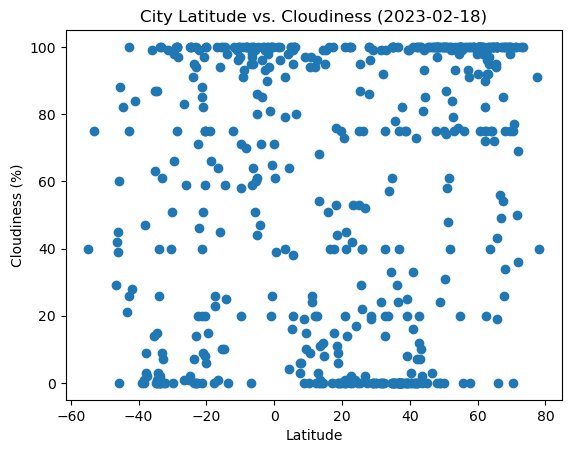

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

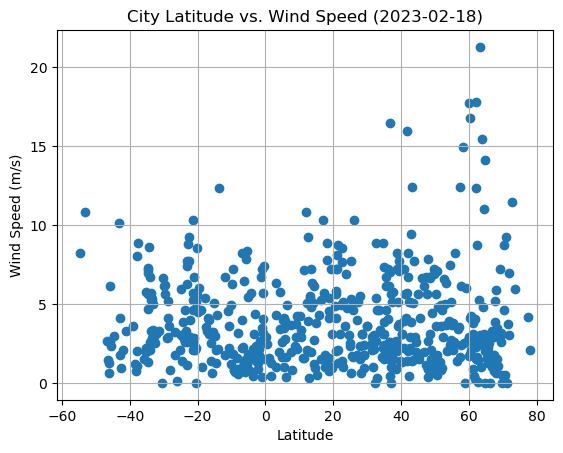

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
city_lat = city_data_df['Lat']
max_temp_y = city_data_df['Max Temp']
humidity_y = city_data_df['Humidity']
cloudiness_y = city_data_df['Cloudiness']
wind_speed_y = city_data_df['Wind Speed']

# slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adrar,20.5022,-10.0711,26.03,12,73,4.86,MR,1676839706
2,barrow,71.2906,-156.7887,-21.99,77,100,0.00,US,1676839708
3,bowmore,34.9421,-79.3031,16.79,67,100,3.09,US,1676839709
9,kavaratti,10.5669,72.6420,26.21,75,9,2.89,IN,1676839714
11,khatanga,71.9667,102.5000,-14.44,90,69,6.99,RU,1676839716


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yulara,-25.2406,130.9889,23.84,52,1,2.07,AU,1676839707
4,potchefstroom,-26.7167,27.1000,18.97,76,83,3.21,ZA,1676839710
5,alice springs,-23.7000,133.8833,19.75,77,0,2.57,AU,1676839711
6,rikitea,-23.1203,-134.9692,26.41,75,14,7.42,PF,1676839712
7,namatanai,-3.6667,152.4333,26.68,83,96,2.18,PG,1676839713


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is: -0.8551584659056387


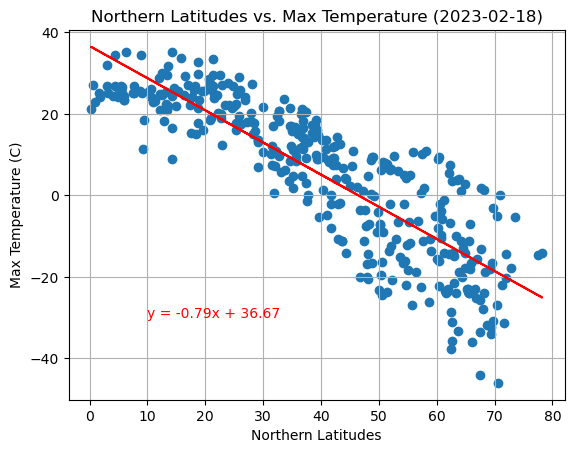

In [15]:
# Linear regression on Northern Hemisphere
northern_city_lat = northern_hemi_df['Lat']
northern_max_temp_y = northern_hemi_df['Max Temp']

n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr = linregress(northern_city_lat, northern_max_temp_y)

n_regression_values = n_slope * northern_city_lat + n_intercept

line_nth = f'y = {round(n_slope,2)}x + {round(n_intercept,2)}'

plt.scatter(northern_city_lat, northern_max_temp_y)
plt.plot(northern_city_lat, n_regression_values, "r-")
plt.title("Northern Latitudes vs. Max Temperature (2023-02-18)")
plt.xlabel("Northern Latitudes")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_nth, (10,-30), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {n_rvalue}')
plt.show()

 The r-value is: 0.5803346062456659


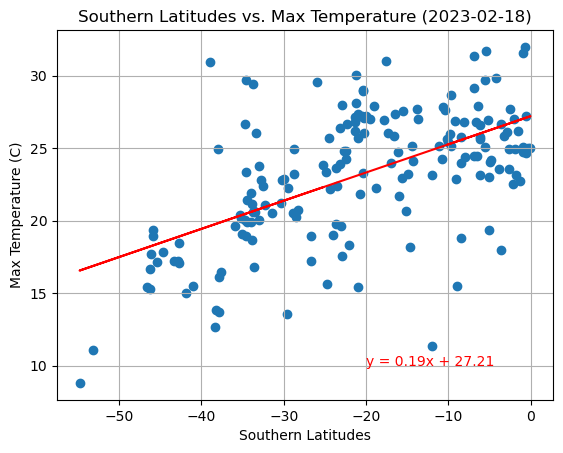

In [16]:
# Linear regression on Southern Hemisphere
southern_city_lat = southern_hemi_df['Lat']
southern_max_temp_y = southern_hemi_df['Max Temp']

s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr = linregress(southern_city_lat, southern_max_temp_y)

s_regression_values = s_slope * southern_city_lat + s_intercept

line_sth = f'y = {round(s_slope,2)}x + {round(s_intercept,2)}'

plt.scatter(southern_city_lat, southern_max_temp_y)
plt.plot(southern_city_lat, s_regression_values, "r-")
plt.title("Southern Latitudes vs. Max Temperature (2023-02-18)")
plt.xlabel("Southern Latitudes")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_sth, (-20,10), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {s_rvalue}')
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between proximity to the Equator and higher tempaeratures. 

### Humidity vs. Latitude Linear Regression Plot

 The r-value is: 0.49328326829048985


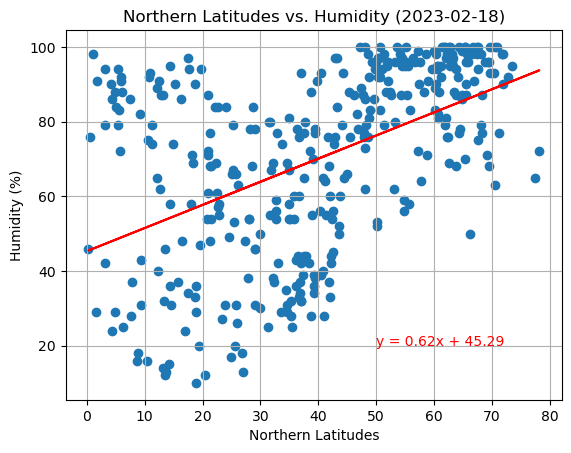

In [17]:
# Northern Hemisphere
northern_city_lat = northern_hemi_df['Lat']
northern_humidity = northern_hemi_df['Humidity']

nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr = linregress(northern_city_lat, northern_humidity)

nh_regression_values = nh_slope * northern_city_lat + nh_intercept

lineh_nth = f'y = {round(nh_slope,2)}x + {round(nh_intercept,2)}'

plt.scatter(northern_city_lat, northern_humidity)
plt.plot(northern_city_lat, nh_regression_values, "r-")
plt.title("Northern Latitudes vs. Humidity (2023-02-18)")
plt.xlabel("Northern Latitudes")
plt.ylabel("Humidity (%)")
plt.annotate(lineh_nth, (50,20), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {nh_rvalue}')
plt.show()

 The r-value is: 0.2955897534316337


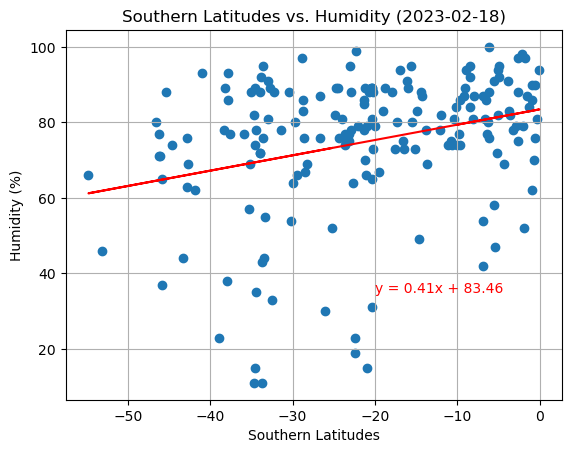

In [18]:
# Southern Hemisphere
southern_city_lat = southern_hemi_df['Lat']
southern_humidity = southern_hemi_df['Humidity']

sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr = linregress(southern_city_lat, southern_humidity)

sh_regression_values = sh_slope * southern_city_lat + sh_intercept

lineh_sth = f'y = {round(sh_slope,2)}x + {round(sh_intercept,2)}'

plt.scatter(southern_city_lat, southern_humidity)
plt.plot(southern_city_lat, sh_regression_values, "r-")
plt.title("Southern Latitudes vs. Humidity (2023-02-18)")
plt.xlabel("Southern Latitudes")
plt.ylabel("Humidity (%)")
plt.annotate(lineh_sth, (-20,35), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {sh_rvalue}')
plt.show()

**Discussion about the linear relationship:** It seems to be a correlation between proximity to the Equetor an higher humidity, however, the same is not as strong as with the temperature.

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is: 0.372461675197969


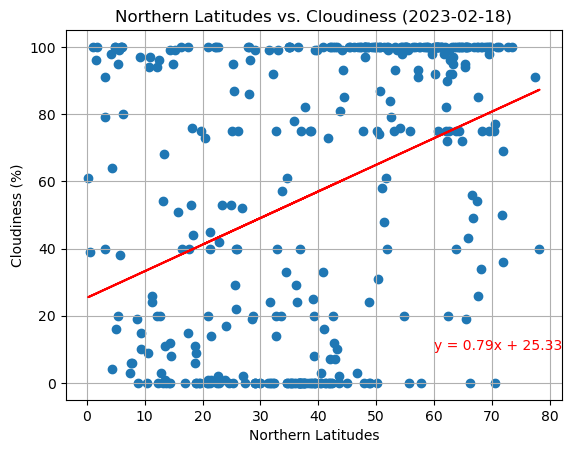

In [19]:
# Northern Hemisphere
northern_city_lat = northern_hemi_df['Lat']
northern_cloudiness = northern_hemi_df['Cloudiness']

nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr = linregress(northern_city_lat, northern_cloudiness)

nc_regression_values = nc_slope * northern_city_lat + nc_intercept

linec_nth = f'y = {round(nc_slope,2)}x + {round(nc_intercept,2)}'

plt.scatter(northern_city_lat, northern_cloudiness)
plt.plot(northern_city_lat, nc_regression_values, "r-")
plt.title("Northern Latitudes vs. Cloudiness (2023-02-18)")
plt.xlabel("Northern Latitudes")
plt.ylabel("Cloudiness (%)")
plt.annotate(linec_nth, (60,10), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {nc_rvalue}')
plt.show()

 The r-value is: 0.41586524616605497


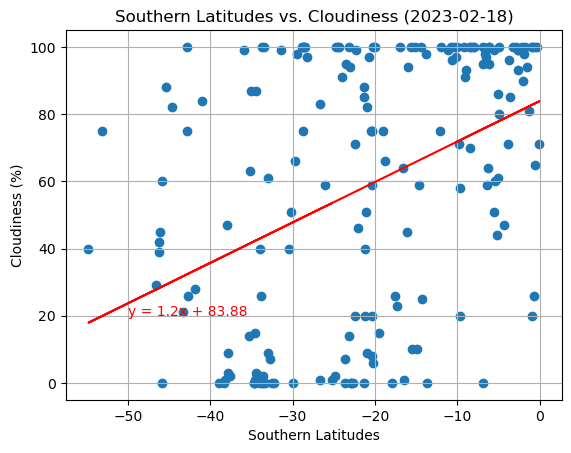

In [20]:
# Southern Hemisphere
southern_city_lat = southern_hemi_df['Lat']
southern_cloudiness = southern_hemi_df['Cloudiness']

sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr = linregress(southern_city_lat, southern_cloudiness)

sc_regression_values = sc_slope * southern_city_lat + sc_intercept

linec_sth = f'y = {round(sc_slope,2)}x + {round(sc_intercept,2)}'

plt.scatter(southern_city_lat, southern_cloudiness)
plt.plot(southern_city_lat, sc_regression_values, "r-")
plt.title("Southern Latitudes vs. Cloudiness (2023-02-18)")
plt.xlabel("Southern Latitudes")
plt.ylabel("Cloudiness (%)")
plt.annotate(linec_sth, (-50,20), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {sc_rvalue}')
plt.show()

**Discussion about the linear relationship:** It seems that there is not correlation between proximity to the Equator and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is: 0.047387292351800246


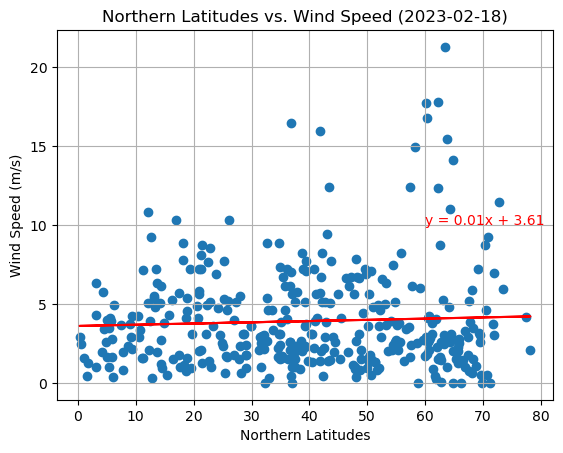

In [21]:
# Northern Hemisphere
northern_city_lat = northern_hemi_df['Lat']
northern_wind = northern_hemi_df['Wind Speed']

nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr = linregress(northern_city_lat, northern_wind)

nw_regression_values = nw_slope * northern_city_lat + nw_intercept

linew_nth = f'y = {round(nw_slope,2)}x + {round(nw_intercept,2)}'

plt.scatter(northern_city_lat, northern_wind)
plt.plot(northern_city_lat, nw_regression_values, "r-")
plt.title("Northern Latitudes vs. Wind Speed (2023-02-18)")
plt.xlabel("Northern Latitudes")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(linew_nth, (60,10), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {nw_rvalue}')
plt.show()

 The r-value is: -0.16797608685651905


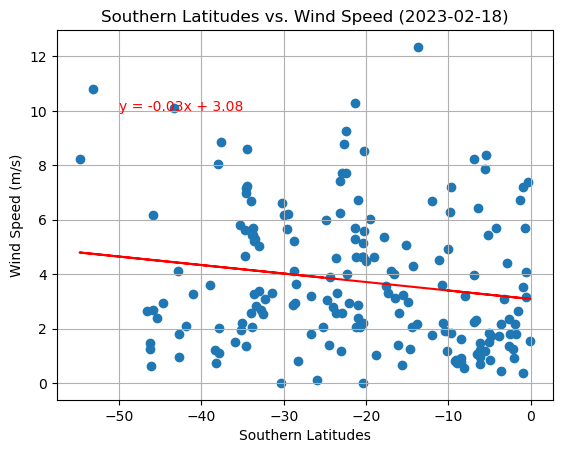

In [22]:
# Southern Hemisphere
southern_city_lat = southern_hemi_df['Lat']
southern_wind = southern_hemi_df['Wind Speed']

sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr = linregress(southern_city_lat, southern_wind)

sw_regression_values = sw_slope * southern_city_lat + sw_intercept

linew_sth = f'y = {round(sw_slope,2)}x + {round(sw_intercept,2)}'

plt.scatter(southern_city_lat, southern_wind)
plt.plot(southern_city_lat, sw_regression_values, "r-")
plt.title("Southern Latitudes vs. Wind Speed (2023-02-18)")
plt.xlabel("Southern Latitudes")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(linew_sth, (-50,10), fontsize=10, color="red")
plt.grid(True)

# Show plot
print(f' The r-value is: {sw_rvalue}')
plt.show()

**Discussion about the linear relationship:** Neither for the wind speed and closeness to the Equator.